# Stage 2 - YOLO result visualisation

This notebook is at Stage 2 of the tooth detection and numbering pipeline. It is to combine the training results from the YOLO_obb and perform visualisation. The training of YOLO_obb is performed using GPU in computer science lab workstation. Details refer to yolo_obb_implementation.zip

In [3]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt  

YOLOv5x_path = './4 Private ZOON Anonymised/Bitewing_proc/labels_trial6XX/6XX_4cls_scratch_yolo5x'
YOLOv5m_path = './4 Private ZOON Anonymised/Bitewing_proc/labels_trial6XX/6XX_4cls_scratch_yolo5m'
YOLOv5n_path = './4 Private ZOON Anonymised/Bitewing_proc/labels_trial6XX/6XX_4cls_scratch_yolo5n'


dfn = pd.read_csv(os.path.join(YOLOv5n_path, 'results.csv'))
dfn.columns = [c.strip() for c in dfn.columns.to_list()] 
dfm = pd.read_csv(os.path.join(YOLOv5m_path, 'results.csv'))
dfm.columns = [c.strip() for c in dfm.columns.to_list()] 
dfl = pd.read_csv(os.path.join(YOLOv5x_path, 'results.csv'))
dfl.columns = [c.strip() for c in dfl.columns.to_list()] 

dfn.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,train/theta_loss,metrics/precision,metrics/recall,metrics/HBBmAP.5,metrics/HBBmAP.5:.95,val/box_loss,val/obj_loss,val/cls_loss,val/theta_loss,x/lr0,x/lr1,x/lr2
0,0,0.070525,0.100120,0.033771,0.26337,0.004964,0.15735,0.002868,0.000594,0.049173,0.094158,0.030549,0.24574,0.003326,0.003326,0.070062
1,1,0.054208,0.111090,0.033525,0.25716,0.033796,0.30504,0.023904,0.004897,0.036480,0.100420,0.029393,0.22289,0.006660,0.006660,0.040062
2,2,0.044621,0.108740,0.032681,0.24440,0.086882,0.27009,0.068753,0.014440,0.035123,0.088942,0.029270,0.21090,0.009992,0.009992,0.010061
3,3,0.044556,0.099917,0.031966,0.22449,0.063847,0.11426,0.052350,0.009699,0.054195,0.072030,0.031334,0.23440,0.009998,0.009998,0.009998
4,4,0.048080,0.088871,0.031200,0.18927,0.072295,0.69782,0.092775,0.019550,0.046077,0.068007,0.027811,0.13651,0.009998,0.009998,0.009998


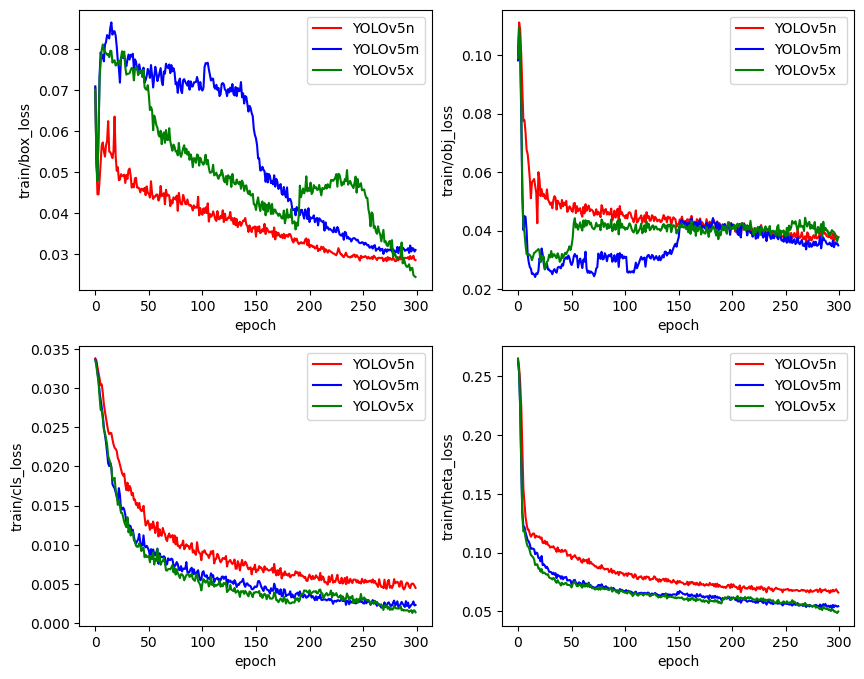

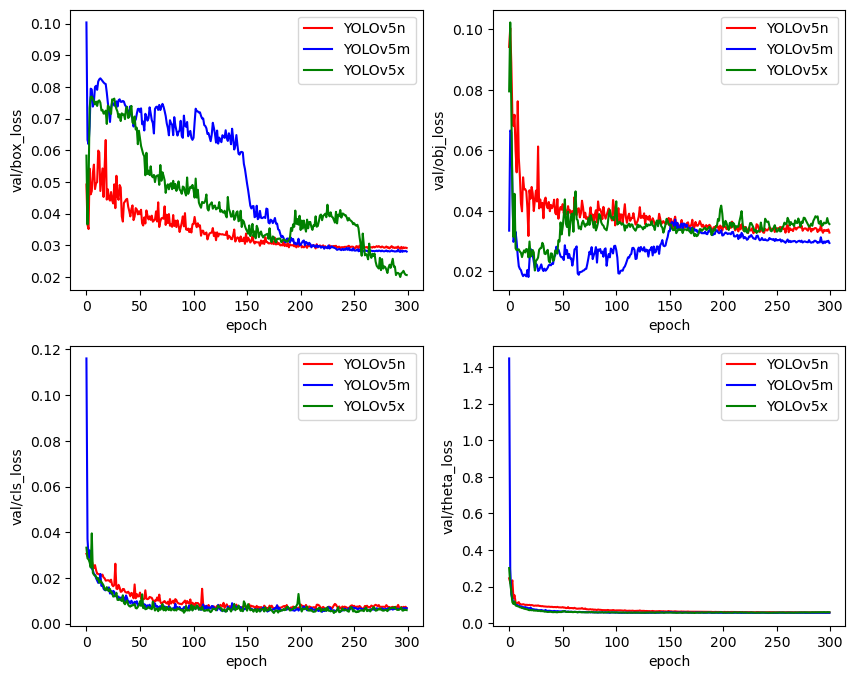

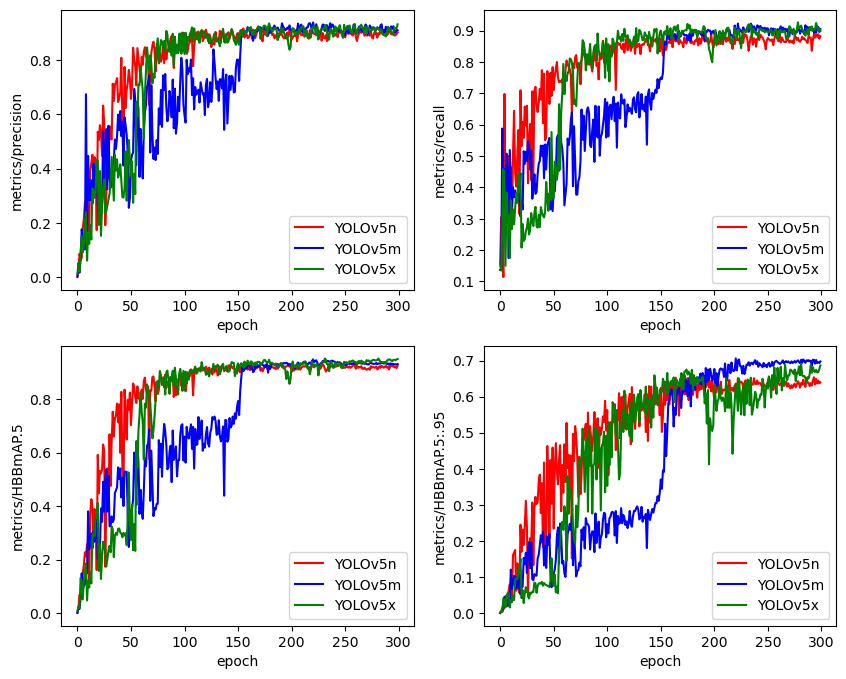

In [4]:
train_cols = ['train/box_loss', 'train/obj_loss', 'train/cls_loss', 'train/theta_loss' ]
val_cols = ['val/box_loss', 'val/obj_loss', 'val/cls_loss', 'val/theta_loss' ]
acc_cols = ['metrics/precision', 'metrics/recall', 'metrics/HBBmAP.5', 'metrics/HBBmAP.5:.95']

for colnames in [train_cols, val_cols, acc_cols]:
    fig, ax = plt.subplots(2,2, figsize=(10,8))
    for k, col in enumerate(colnames):
        ax[k//2][k-2*(k//2)].plot(dfn[col], color='r', label='YOLOv5n')
        ax[k//2][k-2*(k//2)].plot(dfm[col], color='b', label='YOLOv5m')
        ax[k//2][k-2*(k//2)].plot(dfl[col], color='g', label='YOLOv5x')
        ax[k//2][k-2*(k//2)].set_ylabel(col)
        ax[k//2][k-2*(k//2)].set_xlabel('epoch')
        ax[k//2][k-2*(k//2)].legend()
    plt.show()